In [1]:
import numpy as np
import mega
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
cm = plt.cm.get_cmap('plasma_r')
v_lim = [5, 8]

In [2]:
sims = mega.get_simulations()

In [3]:
latitude = 50.   # latitude in degrees
month = 0        # months since spring equinox
hour = 2         # hours since midnight
xy, mag = mega.get_stereographic_data(sims, latitude=latitude, month=month, hour=hour)

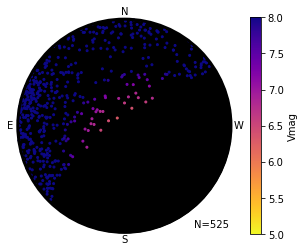

In [4]:
fig, ax= plt.subplots(1,1)
ax.set_aspect("equal")
r_lim = 1.02
ax.set_xlim(-r_lim,r_lim)
ax.set_ylim(-r_lim,r_lim)

# hide axes
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
for s in ax.spines:
    ax.spines[s].set_visible(False)
    
# setup labels    
r_labels = 1.07    
for i, d in enumerate(["N","W","S","E"]):
    ax.text(r_labels*np.sin(i*np.pi/2.),r_labels*np.cos(i*np.pi/2.), d, ha="center", va="center")
ax.text(0.65,-0.95,"N=%d"%len(xy)) 

# background
ax.add_collection(PatchCollection([plt.Circle((0, 0), 1)], zorder=-10, color="black"))
ax.add_collection(PatchCollection([plt.Circle((0, 0), 1)], zorder=3, edgecolor="k", facecolor="none", lw=3))

# plot
im=ax.scatter(xy[:,0],xy[:,1],s=4, c=mag, cmap=cm,vmin=v_lim[0],vmax=v_lim[1])
cb = fig.colorbar(im,label="Vmag")